# Clustering metrics

Clustering is a fundamental technique in unsupervised machine learning that involves grouping similar data points together to uncover underlying patterns or structures in a dataset. To evaluate the performance and quality of clustering algorithms, various metrics are employed to assess how well the algorithm has grouped the data.
Among the key clustering metrics, **Silhouette Score**, **Davies-Bouldin Index**, **Calinski-Harabasz Index**, and **Adjusted Rand Index (ARI)** stand out as widely used measures. Each of these metrics offers a unique perspective on the effectiveness of the clustering algorithsm

It's noteworthy that insights on these metrics and their applications have been particularly helpful, with valuable contributionsfrom thee [book, we recommend you to read!](https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019pd.f).

# Silhouette Score

The Silhouette Score is a metric used to calculate the goodness of a clustering technique for a given dataset. It measures how well-defined the clusters in the data are. The score is based on both the average distance between data points within the same cluster (cohesion) and the average distance between different clusters (separation).

### The Silhouette Score for the *i*th data point, denoted as *s(i)*, is given by:

$$ S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

- **a(i)**: The average distance from the ith data point to the other data points in the same cluster. It represents cohesion.
- **b(i)**: The average distance from the ith data point to the data points in the nearest cluster (i.e., the cluster that the data point is not a part of). It represents separation.

### The overall Silhouette Score for the entire dataset is usually computed as the average of the *S(i)* values for all data points

$$\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n}S(i)$$


- **n**: The number of data points in the dataset.
- **S(i)**: The Silhouette Score for the ith data point.



## Range of Values

   - **-1:** indicates that the data point has been assigned to the wrong cluster. It implies that the data point is better matched to the neighboring clusters than to its own cluster. This scenario suggests a poor clustering result with substantial overlap between clusters.
   - **0:** indicates that the data point is on the boundary between two clusters. It means that the average distance to points in its own cluster is comparable to the average distance to points in the nearest cluster. This situation suggests overlapping or unclear cluster boundaries
   - **1:** indicates that the data point is we-l matched to its own cluster and poorly matched to neighboring clusters. This is an ideal scenario, suggesting distinct, well-defined clusters with clear boundaries.



## Calculating Silhouette Score in Python

The Silhouette Score in Python can be computed using the `scikit-learn` library

## Step 1: Importing necessary libraries


In [ ]:
%%capture
!pip install jupyterquiz
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from jupyterquiz import display_quiz

## Step 2: Generating synthetic data

In [ ]:
data, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

## Step 3: Visualizing the generated data


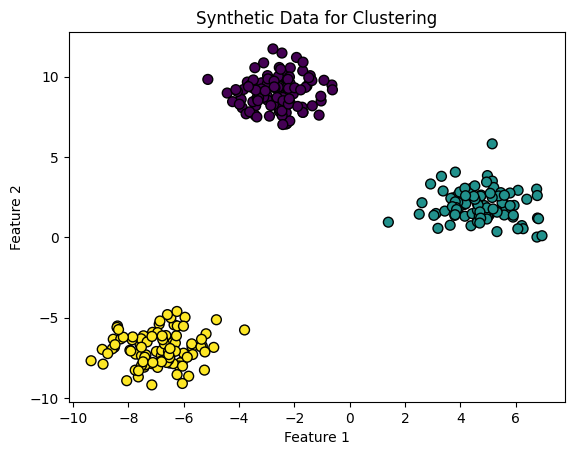

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Synthetic Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Step 4: Clustering using KMeans


In [ ]:
k = 3
model = KMeans(n_clusters=k, random_state=42)
cluster_labels = model.fit_predict(data)

## Step 5: Visualizing the clustering result

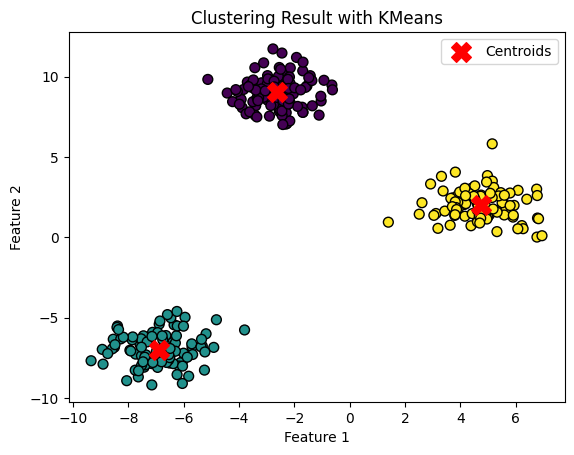

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustering Result with KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Step 6: Calculating Silhouette Score

In [ ]:
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"The average silhouette score for {k} clusters is: {silhouette_avg}")

The average silhouette score for 3 clusters is: 0.8480303059596955


This code generates a synthetic dataset with 300 data points distributed among three clusters using the `make_blobs` function. It then applies the KMeans clustering algorithm with three clusters (`k=3`) to the data. The script visualizes the original data and the clustering result with centroids using Matplotlib. Finally, it calculates and prints the silhouette score, a metric that quantifies the quality of the clustering, with a higher score indicating better-defined clusters. In this specific example, **the silhouette score for three clusters is approximately 0.85**, suggesting that the data is well-clustered.

```{admonition} Exercise
#### You are provided with a simple dataset consisting of two data points and their cluster assignments. Your task is to calculate the Silhouette Score for each data point. The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.

#### Data
* Data point 1: [1, 2] (Cluster 1) <br>
* Data point 2: [4, 5] (Cluster 2) <br>
#### Cluster Assignment
* Data point 1 is assigned to Cluster 1 <br>
* Data point 2 is assigned to Cluster 2 <br>
```
:::{note}
You can check your answer or see the explanation below
:::


>


<div style="display:none" id="q_silh_calc">W3sicXVlc3Rpb24iOiAiWW91ciByZXNwb25zZSBmb3IgVGFzayBBIiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkV4Y2VsbGVudCEgWW91IGNvcnJlY3RseSBjYWxjdWxhdGVkIHRoZSBTaWxob3VldHRlIFNjb3JlLiBXZWxsIGRvbmUhIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk9vcHMhIERvdWJsZS1jaGVjayB0aGUgU2lsaG91ZXR0ZSBTY29yZSBmb3JtdWxhIGFuZCB0cnkgYWdhaW4uIn1dfV0=</div>

In [ ]:
display_quiz("#q_silh_calc")


<IPython.core.display.Javascript object>

```{admonition} Explanation!
:class: tip, dropdown

#### Step 1: Calculate average distance \(a\) for each data point
$ a_1 = \frac{d([1, 2], [4, 5])}{1} $ <br>
$ a_1 = \sqrt{(1-4)^2 + (2-5)^2} = \sqrt{18} $ <br>
$ a_1 = 3\sqrt{2} $ <br>
$ a_2 = \frac{d([4, 5], [1, 2])}{1} $ <br>
$ a_2 = \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{18} $ <br>
$ a_2 = 3\sqrt{2} $ <br>

#### Step 2: Calculate average distance \(b\) for each data point
$ b_1 = \min (\frac{d([1, 2], [4, 5])}{1}) $ <br>
$ b_1 = \sqrt{(1-4)^2 + (2-5)^2} = \sqrt{18} $ <br>
$ b_1 = 3\sqrt{2} $ <br>
$ b_2 = \min (\frac{d([4, 5], [1, 2])}{1}) $ <br>
$ b_2 = \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{18}$  <br>
$ b_2 = 3\sqrt{2} $

#### Step 3: Calculate the Silhouette Score for each data point

$ s_1 = \frac{b_1 - a_1}{\max(a_1, b_1)}$  <br>
$ s_1 = \frac{3\sqrt{2} - 3\sqrt{2}}{\max(3\sqrt{2}, 3\sqrt{2})}$ <br>
$ s_1 = \frac{0}{3\sqrt{2}}$ <br>
$ s_1 = 0$

$ s_2 = \frac{b_2 - a_2}{\max(a_2, b_2)}$  <br>
$ s_2 = \frac{3\sqrt{2} - 3\sqrt{2}}{\max(3\sqrt{2}, 3\sqrt{2})}$ <br>
$ s_2 = \frac{0}{3\sqrt{2}}$ <br>
$ s_2 = 0$


```

<div style="display:none" id="q_clus_qual">W3sicXVlc3Rpb24iOiAiSWYgdGhlIFNpbGhvdWV0dGUgU2NvcmUgZm9yIGEgZGF0YXNldCBpcyBhIG5lZ2F0aXZlIG51bWJlciwgd2hhdCBkb2VzIGl0IHN1Z2dlc3QgYWJvdXQgdGhlIHF1YWxpdHkgb2YgY2x1c3RlcmluZz8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBjbHVzdGVyaW5nIGlzIHdlbGwtZGVmaW5lZCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZy4gQSBoaW50IGlzIGluZGljYXRlZCBqdXN0IGFib3ZlLiJ9LCB7ImFuc3dlciI6ICJUaGUgZGF0YSBwb2ludHMgYXJlIGV2ZW5seSBkaXN0cmlidXRlZCBhY3Jvc3MgY2x1c3RlcnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiV3JvbmcuIEEgaGludCBpcyBpbmRpY2F0ZWQganVzdCBhYm92ZS4ifSwgeyJhbnN3ZXIiOiAiVGhlIGNsdXN0ZXJpbmcgaXMgcG9vcmx5IGRlZmluZWQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZRVMhIFRoaXMgc2NlbmFyaW8gc3VnZ2VzdHMgYSBwb29yIGNsdXN0ZXJpbmcgcmVzdWx0IHdpdGggc3Vic3RhbnRpYWwgb3ZlcmxhcCBiZXR3ZWVuIGNsdXN0ZXJzLiJ9LCB7ImFuc3dlciI6ICJUaGUgZGF0YSBwb2ludHMgYXJlIGNvbmNlbnRyYXRlZCBpbiBhIHNpbmdsZSBjbHVzdGVyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldyb25nLiBBIGhpbnQgaXMgaW5kaWNhdGVkIGp1c3QgYWJvdmUuIn1dfV0=</div>

In [ ]:
display_quiz("#q_clus_qual")

<IPython.core.display.Javascript object>

# Davies-Bouldin Index

The Davis-Buldin index is a validation metric that is used to evaluate clustering models. It is determined by averaging each cluster's resemblance to the cluster that is closest to it. Here, the ratio of the intracluster to the intercluster distance is used to quantify similarity.

The following formula can be used to determine the Davis-Boldin index for a given data set:
$$
\[ DB = \frac{1}{n} \sum_{i=1}^{n} \max_{j\neq i} \left( \frac{S_i + S_j}{M_{ij}} \right) \]
$$
Where:
- $\(n\)$ is the total number of clusters.
- $\(S_i\)$ is the average similarity of cluster $\(S_i\)$ (compactness).
- $\(M_{ij}\)$ is the similarity between clusters $\(S_i\)$ and $\(S_j\)$ (separation).


### Syntax
The davies_bouldin_score can be accessed through the scikit-learn library's sklearn.metrics module. The recommended syntax for utilization is as follows:
```
sklearn.metrics.davies_bouldin_score(X, labels)
```

```{important}
The function takes in two parameters:  $\boldsymbol X$, which is a list containing data points with n features, and labels, which is a list containing predicted labels corresponding to each of the $\boldsymbol n$ samples. It outputs a floating-point value that indicates the Davies-Bouldin score for the provided dataset.
```


### Implementation
Below is the Python implementation of DB index using the sklearn library

The code conducts Agglomerative Hierarchical Clustering (AHC) on the Wine dataset and computes the Davies-Bouldin Index (DBI) to assess the quality of the clustering outcomes. Additionally, it generates a dendrogram to visually represent the hierarchical organization of the data.

Davies-Bouldin Index: 0.5357343073560251


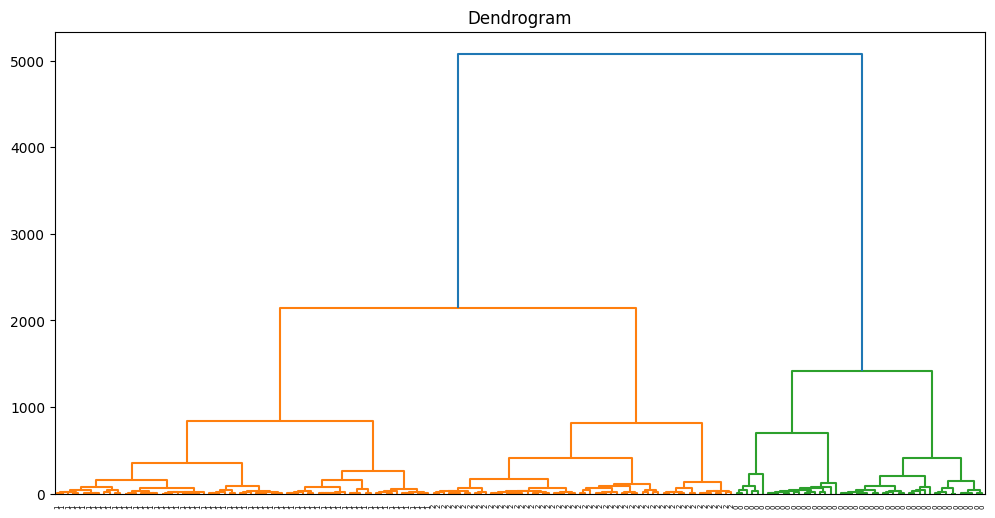

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
data = wine.data

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(data)

# Get the cluster labels
labels = agg_clustering.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation="top", labels=labels, distance_sort='descending')
plt.title('Dendrogram')
plt.show()

### Implementation 2
The code performs Gaussian Mixture Model (GMM) clustering on a synthetic dataset generated using scikit-learn’s make_blobs function. It also calculates the Davies-Bouldin Index (DBI) to evaluate the clustering results and plots a scatter plot to visualize the clustering results.

Davies-Bouldin Index: 0.21231599538998416


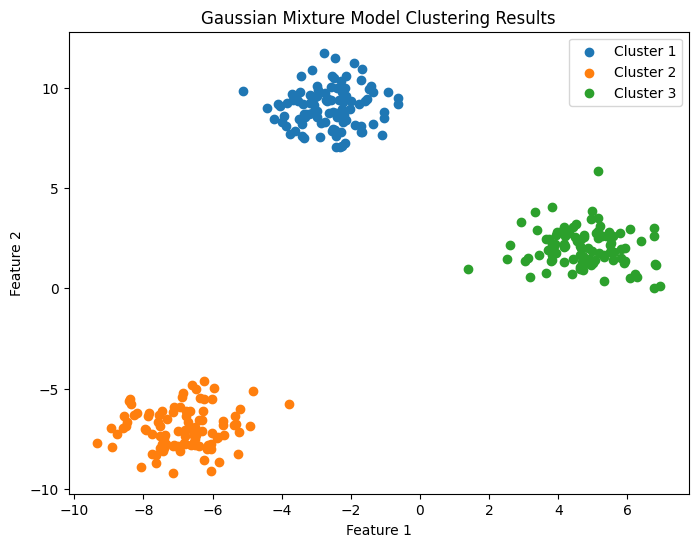

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset with blobs
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, ground_truth_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
gmm.fit(data)

# Get the cluster labels
labels = gmm.predict(data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Plot the clustering results in a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot the data points with different colors for each cluster
for i in range(n_clusters):
	cluster_data = data[labels == i]
	plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering Results')
plt.legend()
plt.show()


## Question
Test your understanding of clustering evaluation metrics by identifying the key parameter assessed by the Davies-Bouldin Index for gauging the quality of clustering models.

<div style="display:none" id="q_non_spherical_clusters">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBEYXZpZXMtQm91bGRpbiBJbmRleCBtZWFzdXJlIHdoZW4gZXZhbHVhdGluZyBjbHVzdGVyaW5nIG1vZGVscz8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBhdmVyYWdlIGRpc3RhbmNlIGJldHdlZW4gZGF0YSBwb2ludHMgaW4gZWFjaCBjbHVzdGVyLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoaXMgbWVhc3VyZSBmb2N1c2VzIG9uIGEgZGlmZmVyZW50IGFzcGVjdCBvZiBjbHVzdGVyaW5nIHF1YWxpdHkuIn0sIHsiYW5zd2VyIjogIlRoZSByYXRpbyBiZXR3ZWVuIGludGVyLWNsdXN0ZXIgYW5kIGludHJhLWNsdXN0ZXIgZGlzdGFuY2VzLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZSBEYXZpZXMtQm91bGRpbiBJbmRleCB1c2VzIHRoaXMgcmF0aW8gdG8gYXNzZXNzIGNsdXN0ZXJpbmcgcXVhbGl0eS4ifSwgeyJhbnN3ZXIiOiAiVGhlIHRvdGFsIG51bWJlciBvZiBjbHVzdGVycyBpbiB0aGUgZGF0YXNldC4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgRGF2aWVzLUJvdWxkaW4gSW5kZXggZG9lcyBub3QgZGlyZWN0bHkgbWVhc3VyZSB0aGUgdG90YWwgbnVtYmVyIG9mIGNsdXN0ZXJzLiJ9LCB7ImFuc3dlciI6ICJUaGUgZGVuc2l0eSBvZiBkYXRhIHBvaW50cyBpbiBlYWNoIGNsdXN0ZXIuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhpcyBhc3BlY3QgaXMgbm90IHRoZSBwcmltYXJ5IGZvY3VzIG9mIHRoZSBEYXZpZXMtQm91bGRpbiBJbmRleC4ifV19XQ==</div>

In [ ]:
display_quiz("#q_non_spherical_clusters")

<IPython.core.display.Javascript object>

# Calinski-Harabasz index


The Calinski-Harabasz index (CH) is a way to measure how well a K-Means clustering algorithm divides data into clusters. It helps assess the effectiveness of the algorithm in creating meaningful groups when a specific number of clusters is used.


The Calinski-Harabasz index (CH) is a way to measure how well a K-Means clustering algorithm divides data into clusters. It helps assess the effectiveness of the algorithm in creating meaningful groups when a specific number of clusters is used.

The Calinski-Harabasz index (also known as the Variance Ratio Criterion) is calculated as a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters (where the dispersion is the sum of squared distances).

## How do you interpret Calinski-Harabasz index?

A high Calinski-Harabasz index (CH) indicates improved clustering because it signifies that data points within each cluster are closely packed (denser), while the clusters themselves are well-separated from one another.

In the upcoming section, we'll delve into a detailed explanation of how to calculate the CH, complete with a few illustrative examples.

To proceed with this tutorial, make sure you have the following Python libraries installed: **sklearn** and **matplotlib**.

# Calinski-Harabasz Index Explained

In this section, we will break down each calculation step and offer insightful examples to enhance your comprehension of the formulas.

## STEP 1

Initially, we calculate the inter-cluster dispersion, also known as the between-group sum of squares (BGSS).

In the CH context, inter-cluster dispersion gauges the weighted sum of squared distances between the centroids of clusters and the centroid of the entire dataset (barycenter).

The calculation for the between-group sum of squares is as follows:

$$\text{BGSS} = \sum_{k=1}^{K}  n_k \cdot \|\mathbf{C}_k - \mathbf{C}\|^2$$


Here are the key terms used in the formula:

- **n<sub>k</sub>**: the number of observations in cluster **k**.
- **C<sub>k</sub>**: the centroid of cluster **k**.
- **C**: the centroid of the dataset (barycenter).
- **K**: the number of clusters.

## Calinski-Harabasz Index Quiz

### Question 1

**What does BGSS stand for in the context of the Calinski-Harabasz Index?**



1.   Between Group Standard Sum
2.   Between Group Sum of Squares
3.   Barycenter Group Squared Sum
4. Balanced Group Sum

<details>
<summary><b>Answer</b></summary>
b. Between Group Sum of Squares
</details>

### Question 2

**What does the inter-cluster dispersion measure in the Calinski-Harabasz Index?**

1. Within Group Sum of Squares
2. Weighted sum of squared distances between centroids
3. Total number of observations
4. Total sum of squares

<details>
<summary><b>Answer</b></summary>
b. Weighted sum of squared distances between centroids
</details>

### Question 3

**How is the between group sum of squares (BGSS) calculated?**

1. BGSS = ∑(Ck - C)
2. BGSS = ∑(nk × ||Ck - C||^2)
3. BGSS = ∑(nk - Ck - C)^2
4. BGSS = K × ∑(||Ck - C||^2)

<details>
<summary><b>Answer</b></summary>
b. BGSS = ∑(nk × ||Ck - C||^2)
</details>

### Question 4

**What does 'nk' represent in the BGSS formula?**

1. Total number of clusters
2. The number of observations in cluster k
3. Barycenter of the dataset
4. Between Group Sum of Squares

<details>
<summary><b>Answer</b></summary>
b. The number of observations in cluster k
</details>


## STEP 2
Next, the second step involves calculating the intra-cluster dispersion, or the within-group sum of squares (WGSS).

In the CH context, intra-cluster dispersion assesses the sum of squared distances between each observation and the centroid of its corresponding cluster.

For each cluster **k** we will compute the **WGSS<sub>k</sub>** as:

$$\text{WGSS}_k = \sum_{k=1}^{{n_k}}  \|\mathbf{X}_ik - \mathbf{C}_k\|^2$$


Here are the key terms used in the formula:

- **n<sub>k</sub>**: the number of observations in cluster **k**.
- **X<sub>ik</sub>**: the i-th observation of cluster **k**.
- **C<sub>k</sub>**:  the centroid of cluster **k**.

And then sum all individual within group sums of squares:
$$\text{WGSS} = \sum_{k=1}^{K} \mathbf{WGSS}_k$$


Here are the key terms used in the formula:

- **WGSS<sub>k</sub>**: the within group sum of squares of cluster **k**.
- **K**:   the number of clusters.

<div style="display:none" id="q_demo_seq">W3sicXVlc3Rpb24iOiAiRm9yIGNsdXN0ZXIgaywgaWYgbmsgPSA1IGFuZCB0aGUgY2VudHJvaWQgQ2sgaGFzIGNvb3JkaW5hdGVzICgyLCAzKSwgY2FsY3VsYXRlIHRoZSBpbnRyYS1jbHVzdGVyIGRpc3BlcnNpb24gKFdHU1NrKSB1c2luZyB0aGUgZm9ybXVsYSBXR1NTay4gUHJvdmlkZSB5b3VyIG51bWVyaWMgYW5zd2VyIiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDI1LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJUUlVFIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIkZBTFNFIn1dfV0=</div>

In [ ]:
display_quiz("#q_demo_seq")

<IPython.core.display.Javascript object>

## Step 3: Calculate Calinski-Harabasz Index

The Calinski-Harabasz index is determined by summing the inter-cluster dispersion and the intra-cluster dispersion across all clusters.

The calculation for the Calinski-Harabasz index is as follows:

$$\text{WGSS} = \frac{ \frac{BGSS}{K-1} }{ \frac{WGSS}{N-K} } = \frac{BGSS}{WGSS} \times \frac{N-K}{K-1}$$


Here are the key terms used in the formula:

- **BGSS**:   between-group sum of squares (between-group dispersion).
- **WGSS**:   within-group sum of squares (within-group dispersion).
- **N**:   total number of observations.
- **K**:  total number of clusters.

From the above formula, we can conclude that the large values of Calinski-Harabasz index represent better clustering.

# Calinski-Harabasz Index Example in Python

In this part, we'll walk through an example of computing the Calinski-Harabasz index for a K-Means clustering algorithm in Python.

To begin, import the necessary dependencies:

Feel free to utilize any dataset with the provided code. For simplicity, we'll use the built-in Iris dataset, focusing specifically on the first two features: "sepal width" and "sepal length":

We'll begin by setting the target for K-Means to have 3 clusters:

185.33266845949427


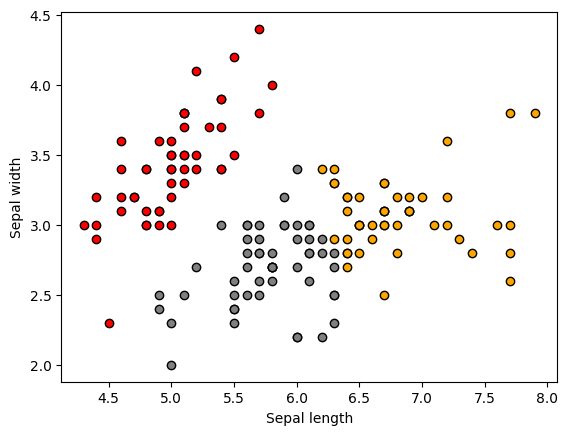

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]

kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(X)

ch_index = calinski_harabasz_score(X, labels)

print(ch_index)

unique_labels = list(set(labels))
colors = ['red', 'orange', 'grey']

for i in unique_labels:
    filtered_label = X[labels == i]
    plt.scatter(filtered_label[:,0],
                filtered_label[:,1],
                color = colors[i],
                edgecolor='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


And check the Calinski-Harabasz index for the above results:

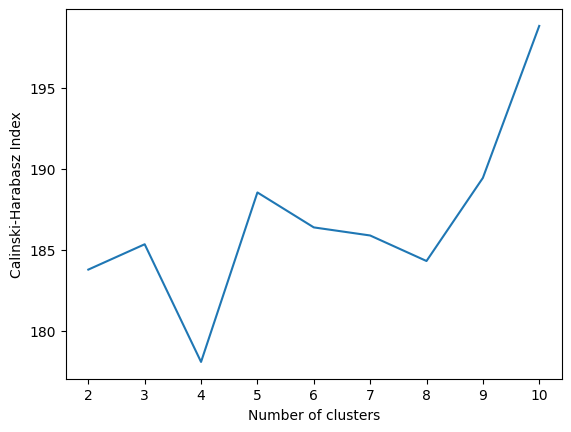

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()


You should get the resulting score: **185.33266845949427** or approximately (**185.33**).

Given that we computed the CH index for 3 clusters and the original data has 3 labels, we expect the CH index to be highest for 3 clusters compared to other cluster numbers.

Now, let's compute the CH index for a range of cluster numbers and identify the highest values:

An interesting observation emerges as 5 clusters and 10 clusters yield a higher Calinski-Harabasz index value compared to 3 clusters, despite the actual number of labels in the data being 3.

It's worth noting that while we can obtain higher CH index values for cluster numbers other than 3, the index values remain within a very close range, roughly between 175 and 200.